In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# set your hyperparameters
nn = 'True'
dyn = 'Poly'
re = 'mul'
lr = '0.05'
hidden = '8'
prop = 'Uni'
gamma = 0.0
t = 50

In [3]:
# comment out what you do not need
dpf = np.loadtxt(f'results/mse/dpf_nn{nn}_{dyn}_{re}_lr{lr}_hidden{hidden}', delimiter=',', skiprows=1, usecols=(np.arange(1, t+1)))
mmpf = np.loadtxt(f'results/mse/mmpf_{dyn}_gamma{gamma}_{re}', delimiter=',', skiprows=1, usecols=(np.arange(1, t+1)))
rsdpf = np.loadtxt(f'results/mse/rsdpf_nn{nn}_{dyn}_{prop}_{re}_lr{lr}_hidden{hidden}', delimiter=',', skiprows=1, usecols=(np.arange(1, t+1)))
rspf = np.loadtxt(f'results/mse/rspf_{dyn}_{prop}_{re}', delimiter=',', skiprows=1, usecols=(np.arange(1, t+1)))

In [4]:
print(np.sqrt(dpf.mean(axis=1)).mean(), np.sqrt(dpf.mean(axis=1)).min(), np.sqrt(dpf.mean(axis=1)).max())
print(np.sqrt(mmpf.mean(axis=1)).mean(), np.sqrt(mmpf.mean(axis=1)).min(), np.sqrt(mmpf.mean(axis=1)).max())
print(np.sqrt(rsdpf.mean(axis=1)).mean(), np.sqrt(rsdpf.mean(axis=1)).min(), np.sqrt(rsdpf.mean(axis=1)).max())
print(np.sqrt(rspf.mean(axis=1)).mean(), np.sqrt(rspf.mean(axis=1)).min(), np.sqrt(rspf.mean(axis=1)).max())

2.0021589471964747 0.5355120606518587 8.443533702001076
2.1659063561630543 0.7948153014460655 7.958326635189083
0.9752092190641645 0.32474597767627544 4.787238985638591
0.6374126879273251 0.2764774257332233 1.6062880454770871


In [5]:
# analyse if there are some outliers
m = np.sqrt(dpf).mean(axis=1)
m = m[m<50]
print(m.mean(), m.shape)

q = np.sqrt(mmpf).mean(axis=1)
q = q[q<50]
print(q.mean(), q.shape)

a = np.sqrt(rsdpf).mean(axis=1)
a = a[a<50]
print(a.mean(), a.shape)

x = np.sqrt(rspf).mean(axis=1)
x = x[x<50]
print(x.mean(), x.shape)

1.3667692340557147 (500,)
1.4944572989312181 (500,)
0.6947513571493907 (500,)
0.4284878712955502 (500,)


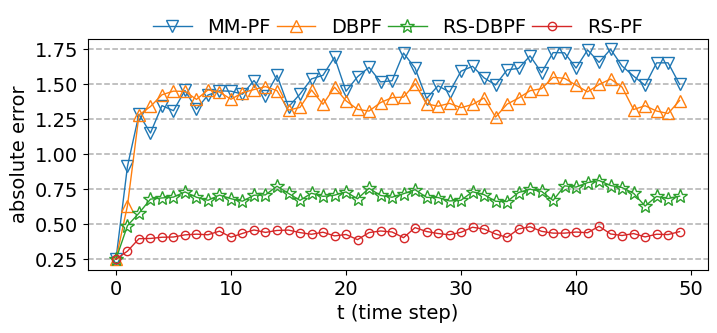

In [6]:
fig = plt.figure(figsize=(8, 3))
plt.plot(np.sqrt(mmpf).mean(axis=0), label='MM-PF', linewidth=1, marker='v', mfc='none', markersize=8)

plt.plot(np.sqrt(dpf).mean(axis=0), label='DBPF', linewidth=1, marker='^', mfc='none', markersize=8)

plt.plot(np.sqrt(rsdpf).mean(axis=0), label='RS-DBPF', linewidth=1, marker='*', mfc='none', markersize=10)

plt.plot(np.sqrt(rspf).mean(axis=0), label='RS-PF', linewidth=1, marker='.', mfc='none', markersize=12)

plt.xlabel('t (time step)', fontsize=14)
plt.ylabel('absolute error', fontsize=14)
# plt.ylim(0, 1.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.yscale('log')
plt.legend(loc='center',bbox_to_anchor=(0.5, 1.05), fontsize=14, ncol=4, columnspacing=0.3, framealpha=0)
plt.grid(linestyle='--', linewidth=1.1, axis='y')
# plt.tight_layout()
plt.savefig(f'MSE_{dyn}_1', bbox_inches='tight')
plt.show()